#1. 영상의 명암비 조절(밝기 중앙값 128의 차로 조절)

Mounted at /content/gdrive


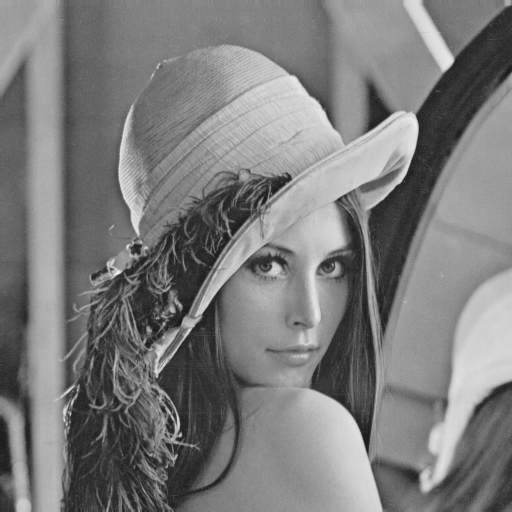

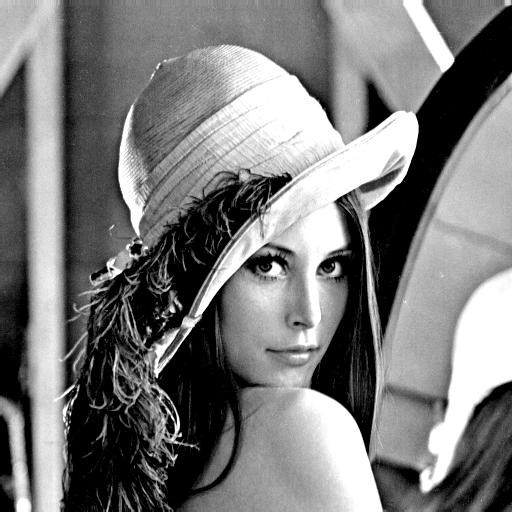

In [ ]:
# 구글 드라이브에 연결하기
from google.colab import drive
drive.mount('/content/gdrive')

# 구글 코랩에서 OpenCV의 cv2.imshow()대신 cv2_imshow() 사용
from google.colab.patches import cv2_imshow

import sys
import numpy as np
import cv2

src= cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
if src is None:
    print('Image load failed!')
    sys.exit()

alpha = 1.0
dst= np.clip((1+alpha)*src-128*alpha, 0, 255).astype(np.uint8)

cv2_imshow(src)
cv2_imshow(dst)

# cv2.waitKey()
# cv2.destroyAllWindows()

#2. 영상의 자동 명암비 조절 - 히스토그램 스트레칭

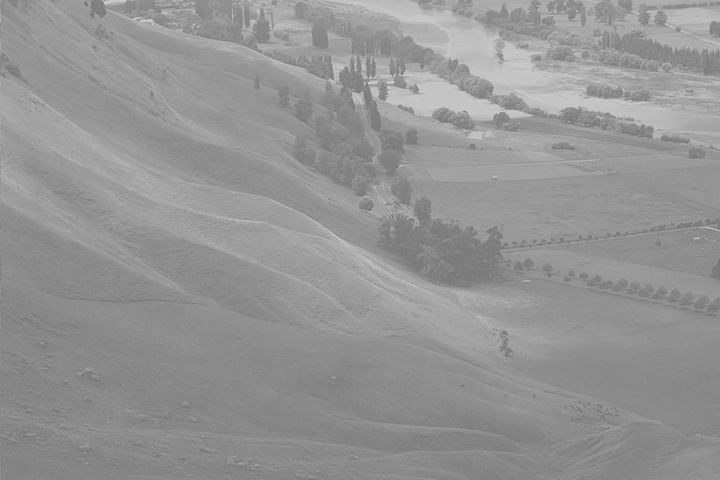

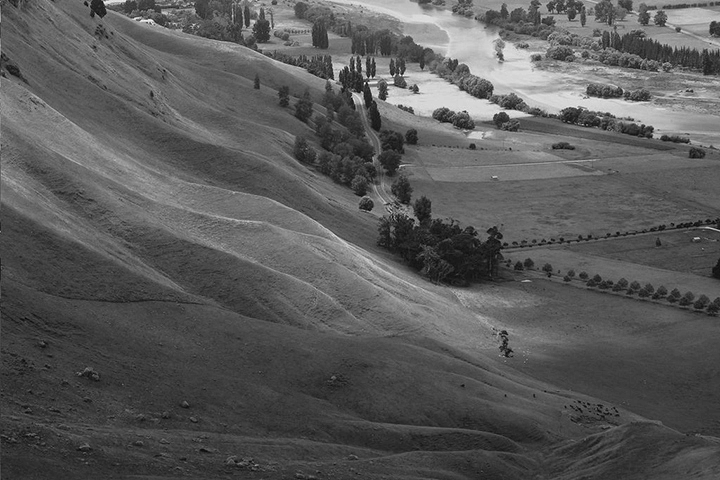

In [ ]:
import sys
import numpy as np
import cv2

src = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

gmin, gmax, _, _ = cv2.minMaxLoc(src)
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
#dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)

cv2_imshow(src)
cv2_imshow(dst)

# cv2.waitKey()
# cv2.destroyAllWindows()

#3. 히스토그램 평활화

In [ ]:
import sys
import numpy as np
import cv2

# 그레이스케일 영상의 히스토그램 평활화
src= cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/Hawkes.jpg', cv2.IMREAD_GRAYSCALE)
if src is None:
    print('Image load failed!')
    sys.exit()

dst= cv2.equalizeHist(src)
cv2_imshow(src)
cv2_imshow(dst)

# cv2.waitKey()
# cv2.destroyAllWindows()

# 컬러 영상의 히스토그램 평활화
src= cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/field.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb= cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
ycrcb_planes= list(cv2.split(src_ycrcb)) # Convert tuple to list

# 밝기 성분에 대해서만 히스토그램 평활화 수행
ycrcb_planes[0] = cv2.equalizeHist(ycrcb_planes[0])
dst_ycrcb= cv2.merge(ycrcb_planes)
dst= cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2_imshow(src)
cv2_imshow(dst)
# cv2.waitKey()
# cv2.destroyAllWindows()

#4. RGB, HSV 특정 색상 영역 추출(밝은 조명)

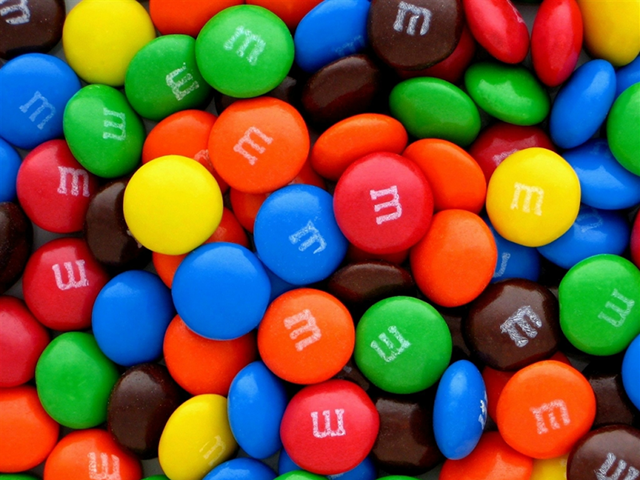

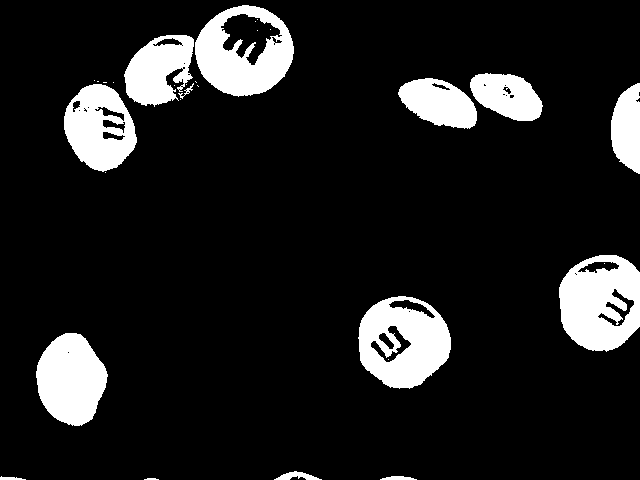

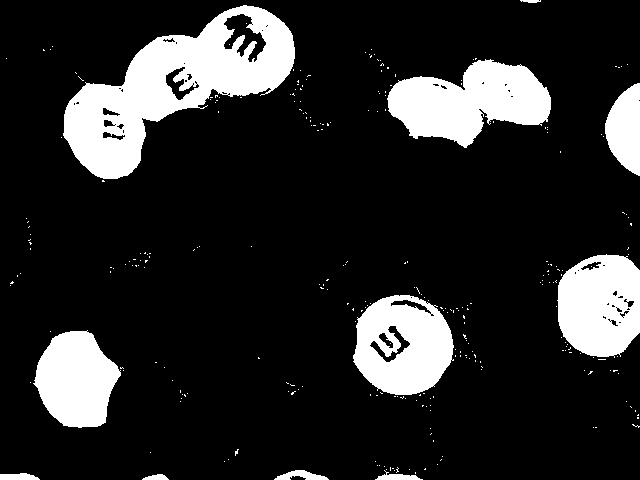

In [ ]:
import sys
import numpy as np
import cv2

src= cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/candies.png')
#src = cv2.imread('candies2.png')

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv= cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# 밝은 조명 이미지에서 녹색 영역 추출
dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))      # RGB image
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))  # HSV image

cv2_imshow(src)
cv2_imshow(dst1) # RGB
cv2_imshow(dst2) # HSV

# cv2.waitKey()
# cv2.destroyAllWindows()

#5. RGB, HSV 특정 색상 영역 추출(어두운 조명)

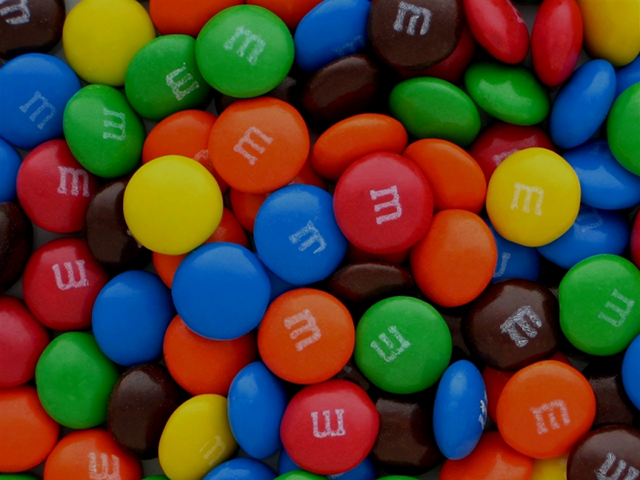

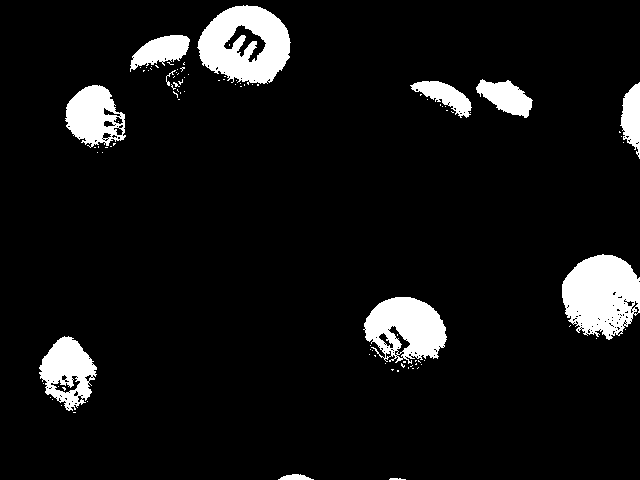

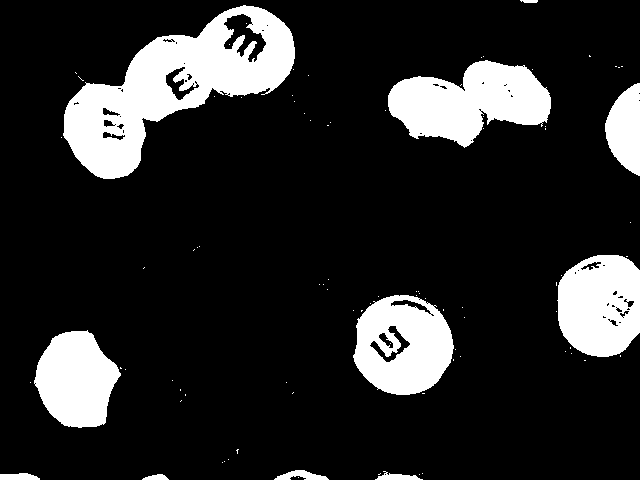

In [ ]:
import sys
import numpy as np
import cv2

# src= cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/candies.png')
src = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/candies2.png')

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv= cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# 어두운 조명 이미지에 녹색 영역 추출
dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))      # RGB image
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))  # HSV image

cv2_imshow(src)
cv2_imshow(dst1) # RGB
cv2_imshow(dst2) # HSV

# cv2.waitKey()
# cv2.destroyAllWindows()

#6. 히스토그램 역투영(살색 영역 추출하기)

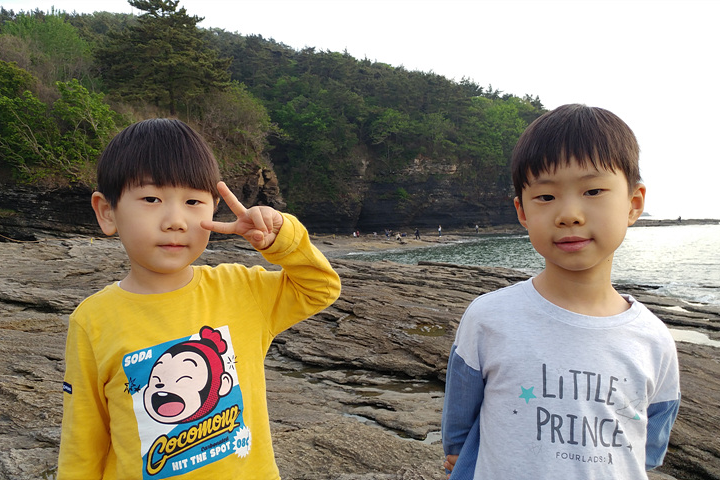

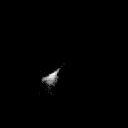

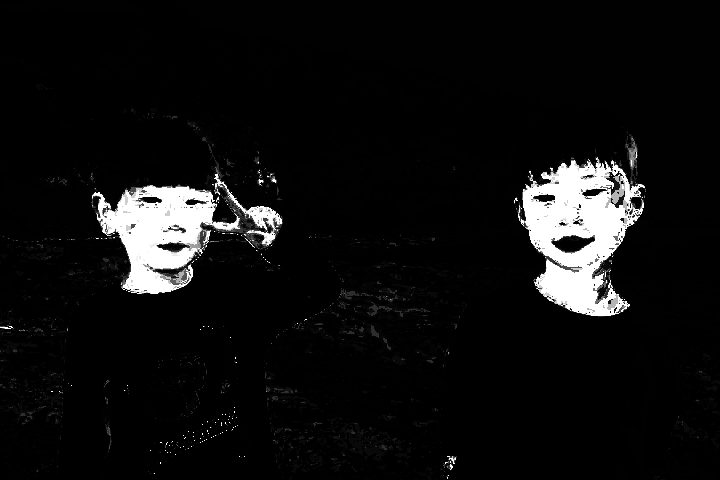

In [ ]:
# 구글 코랩에서 OpenCV의 cv2.imshow()대신 cv2_imshow() 사용
from google.colab.patches import cv2_imshow

import sys
import numpy as np
import cv2

# CrCb살색 히스토그램 구하기
ref = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/kids1.png', cv2.IMREAD_COLOR)
mask = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/kids1_mask.bmp', cv2.IMREAD_GRAYSCALE)

if ref is None or mask is None:
    print('Image load failed!')
    sys.exit()

ref_ycrcb= cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)
channels = [1, 2]
ranges = [0, 256, 0, 256]

hist = cv2.calcHist([ref_ycrcb], channels, mask, [128, 128], ranges)

hist_norm= cv2.normalize(cv2.log(hist + 1), None, 0, 255,
cv2.NORM_MINMAX, cv2.CV_8U)

# 입력 영상에 히스토그램 역투영 적용
src= cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/kids2.png', cv2.IMREAD_COLOR)
if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb= cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
backproj= cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2_imshow(src)
cv2_imshow(hist_norm)
cv2_imshow(backproj)

# cv2.waitKey()
# cv2.destroyAllWindows()